In [102]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [103]:
df=pd.read_csv("./height-weight.csv")

In [104]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [106]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [107]:
#print("Height: ", df['Height'])
print("Weight:", df['Weight'])

Weight: 0      45
1      58
2      48
3      60
4      70
5      78
6      80
7      90
8      95
9      78
10     82
11     95
12    105
13    100
14     85
15     78
16     50
17     65
18     76
19     87
20     45
21     56
22     72
Name: Weight, dtype: int64


Text(0, 0.5, 'Height')

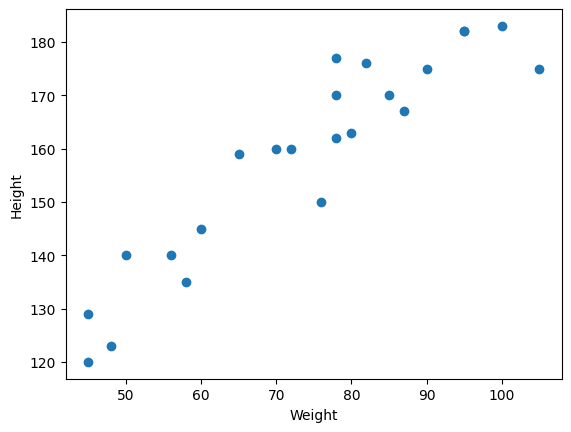

In [108]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


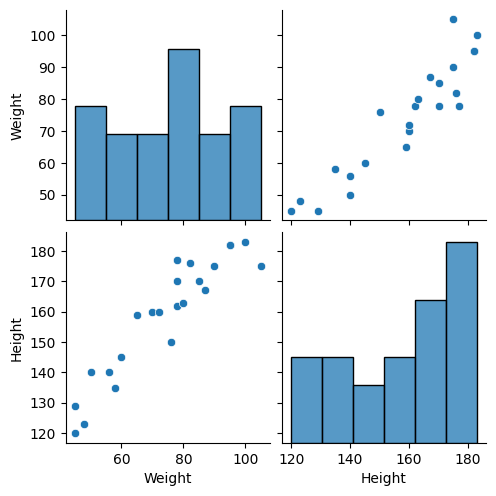

In [109]:
import seaborn as sns
sns.pairplot(df)
df.corr()

In [110]:
#devide dataset in to dependent and dependent features
X=df[['Weight']]
y=df['Height']

In [111]:
X.shape
#type(X)

(23, 1)

In [112]:
#
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [113]:
X_train.shape


(18, 1)

In [114]:
#Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

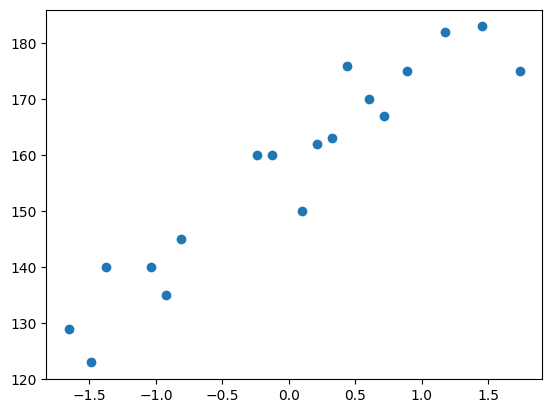

In [115]:
plt.scatter(X_train,y_train)

In [116]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression(n_jobs=-1)
regressor

LinearRegression(n_jobs=-1)

In [117]:
type(X_train)

numpy.ndarray

In [118]:
regressor.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [120]:
print('Coeff:', regressor.coef_)
print('Intercept:', regressor.intercept_)
regressor.coef_

Coeff: [17.03440872]
Intercept: 157.5


array([17.03440872])

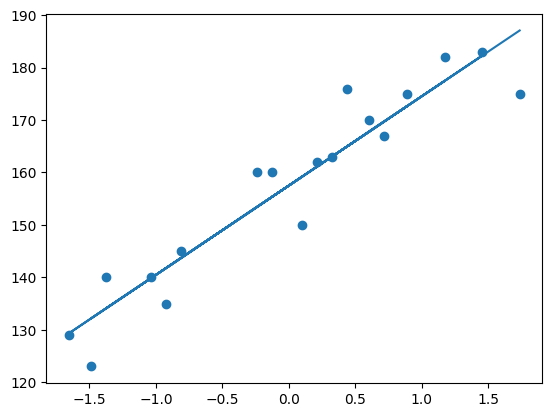

In [121]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))

In [122]:
y_pred_test=regressor.predict(X_test)

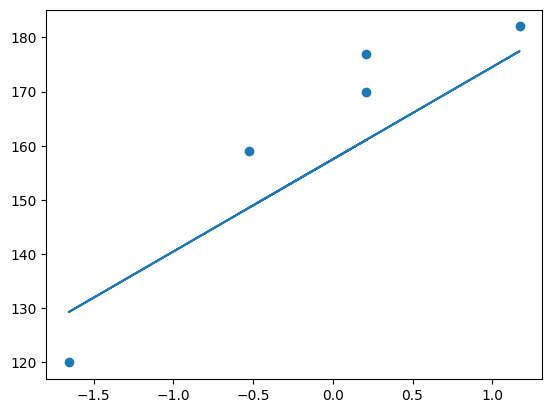

In [123]:
plt.scatter(X_test,y_test)
plt.plot(X_test, regressor.predict(X_test))

In [124]:
### Performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [130]:
mse=mean_squared_error(y_test, y_pred_test)
mae=mean_absolute_error(y_test, y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [131]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)

0.776986986042344


In [134]:
#Residuals
residuals=y_test-y_pred_test
type(residuals)
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

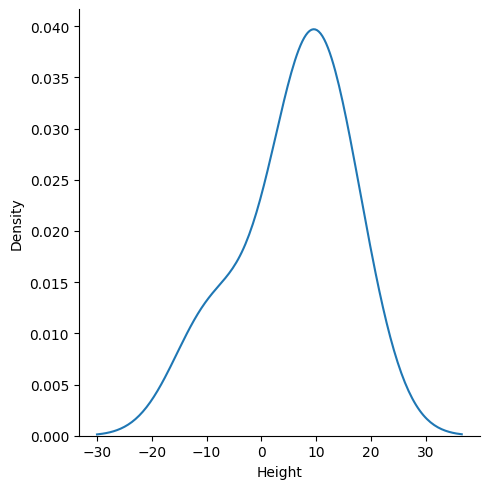

In [140]:
#Plot this residuals
sns.displot(residuals,kind='kde')